### Setup

In [1]:
# !pip install -U -q kaggle 
# !mkdir ~/.kaggle
# !ls
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !kaggle datasets download -d dermisfit/fraud-transactions-dataset
# !unzip /content/fraud-transactions-dataset.zip

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime
from datetime import date

In [3]:
print(pd.__version__)

1.5.0


### Load dataset

In [4]:
df_train = pd.read_csv("data/fraudTrain.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_test = pd.read_csv("data/fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_train.shape

(1296675, 23)

In [7]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df_test.shape

(555719, 23)

In [10]:
df_test['is_fraud'].value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

In [11]:
# Concatenating train and test dataset
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape 

(1852394, 23)

In [12]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
# remove the column unnamed
df = df.drop('Unnamed: 0', axis=1)
df.head() 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [15]:
#check columns that have missing values
df.isna().sum().sum() #.sort_values(ascending=False)

0

In [16]:
# taking a look at the data types
df.dtypes.value_counts()

object     12
int64       5
float64     5
dtype: int64

In [17]:
df.select_dtypes(include='number')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [18]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [19]:
df['is_fraud'] = df['is_fraud'].map({0: 'No', 1: 'Yes'})
df['is_fraud'].value_counts(normalize=True)

No     0.99479
Yes    0.00521
Name: is_fraud, dtype: float64

### Date column cleaning


In [20]:
# converting trans_date_trans_time 
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [21]:
# converting dob to date time
df['dob'] = pd.to_datetime(df['dob']).dt.date

In [22]:
# convert the trans_date_trans_time datetime column to month, year, and day 
df['trans_date_month'] = pd.DatetimeIndex(df['trans_date_trans_time']).month_name()
df['trans_date_year'] = df['trans_date_trans_time'].dt.year
df['trans_date_day'] = df['trans_date_trans_time'].dt.day
df['trans_date_time'] = df['trans_date_trans_time'].dt.time 
df['trans_date'] = df['trans_date_trans_time'].dt.date 

In [23]:
df['trans_date'].head()

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: trans_date, dtype: object

In [24]:
# Age calculation
# get current date
current_date = pd.Timestamp(datetime.date.today())

#Create a new variable Age
df['age'] = current_date - pd.to_datetime(df['dob'])

# calculate age
df['age'] = (current_date - pd.to_datetime(df['dob'])).astype('<m8[Y]').astype(int)

In [25]:
# Convert Unix time to datetime object
df['datetime'] = df['unix_time'].apply(datetime.datetime.fromtimestamp)

# Convert datetime object to formatted string
df['time_str'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [26]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_date_month,trans_date_year,trans_date_day,trans_date_time,trans_date,age,datetime,time_str
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,No,January,2019,1,00:00:18,2019-01-01,35,2012-01-01 01:00:18,2012-01-01 01:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,No,January,2019,1,00:00:44,2019-01-01,44,2012-01-01 01:00:44,2012-01-01 01:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,No,January,2019,1,00:00:51,2019-01-01,61,2012-01-01 01:00:51,2012-01-01 01:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,No,January,2019,1,00:01:16,2019-01-01,56,2012-01-01 01:01:16,2012-01-01 01:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,No,January,2019,1,00:03:06,2019-01-01,37,2012-01-01 01:03:06,2012-01-01 01:03:06


### Categorical columns

In [27]:
cat_df = df.select_dtypes(include='O')
cat_df.head()

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,is_fraud,trans_date_month,trans_date_time,trans_date,time_str
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,No,January,00:00:18,2019-01-01,2012-01-01 01:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,No,January,00:00:44,2019-01-01,2012-01-01 01:00:44
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,No,January,00:00:51,2019-01-01,2012-01-01 01:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,No,January,00:01:16,2019-01-01,2012-01-01 01:01:16
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,No,January,00:03:06,2019-01-01,2012-01-01 01:03:06


In [28]:
df.drop(['street', 'city', 'zip', 'street'], 
        inplace=True, axis=1)
# 'cc_num', 'trans_num',

In [29]:
cat_df = df.select_dtypes(include='O')
cat_df.head()

,merchant,category,first,last,gender,state,job,dob,trans_num,is_fraud,trans_date_month,trans_date_time,trans_date,time_str
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,NC,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,No,January,00:00:18,2019-01-01,2012-01-01 01:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,No,January,00:00:44,2019-01-01,2012-01-01 01:00:44
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,No,January,00:00:51,2019-01-01,2012-01-01 01:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,MT,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,No,January,00:01:16,2019-01-01,2012-01-01 01:01:16
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,VA,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,No,January,00:03:06,2019-01-01,2012-01-01 01:03:06


In [30]:
cat_df.columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'state', 'job',
       'dob', 'trans_num', 'is_fraud', 'trans_date_month', 'trans_date_time',
       'trans_date', 'time_str'],
      dtype='object')

In [31]:
df['full_name'] = df['first'].str.cat(df['last'], sep=' ')
df.drop(['first', 'last'], axis=1, inplace=True)

In [32]:
df.describe(include=['object', 'bool'])

,merchant,category,gender,state,job,dob,trans_num,is_fraud,trans_date_month,trans_date_time,trans_date,time_str,full_name
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,693,14,2,51,497,984,1852394,2,12,86400,730,1819583,989
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,No,December,23:33:40,2020-11-30,2013-12-17 21:36:39,Scott Martin
freq,6262,188029,1014749,135269,13898,8044,1,1842743,280598,52,6530,4,6583


In [33]:
# each user used one credit card
df.groupby(['full_name', 'dob']).agg(
    {'cc_num': 'nunique'}).reset_index()['cc_num'].max()

1

In [34]:
# df['cc_num'].value_counts().sort_values(ascending=False)

In [35]:
# fig = px.line(df, y='amt', color='is_fraud') # x='trans_date_time',
# fig.show()

### **Daily Number Transactions per Customer**

In [36]:
fraud_trans = df[df['is_fraud'] == 'Yes']
legit_trans = df[df['is_fraud'] == 'No']

In [37]:
# grouping the databy full name and counting the number of transactions per customer
fraud_trans_count = (
    fraud_trans.groupby(["full_name", "trans_date"])
    .agg({"trans_num": "count"})
    .reset_index()
    .rename(columns={"trans_num": "no_transactions_per_customer"})
)

# grouping the databy full name and counting the number of transactions per customer
legit_trans_count = (
    legit_trans.groupby(["full_name", "trans_date"])
    .agg({"trans_num": "count"})
    .reset_index()
    .rename(columns={"trans_num": "no_transactions_per_customer"})
)


In [38]:
legit_trans_count.head()

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-01-01,7
1,Aaron Murray,2019-01-02,1
2,Aaron Murray,2019-01-03,2
3,Aaron Murray,2019-01-05,3
4,Aaron Murray,2019-01-06,2


In [39]:
fraud_trans_count.head()

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12


In [40]:
def plot_trans_count_by_cust(name):
  fraud_cust = fraud_trans_count[fraud_trans_count['full_name'] == name]

  # Create a Plotly figure with a line plot of the transaction count over time.
  fig = px.line(
      legit_trans_count[legit_trans_count["full_name"] == name],
      x="trans_date",
      y="no_transactions_per_customer",
      labels={
          "trans_date": "Transaction date",
          "no_transactions_per_customer": "Number of transactions",
      },
      title=f"Daily Transaction counts for customer: {name}",
  )

  # Legend for line plot
  fig["data"][0]["showlegend"] = True
  fig["data"][0]["name"] = "Legitimate"

  fig.add_scatter(
      x=fraud_cust["trans_date"],
      y=fraud_cust["no_transactions_per_customer"],
      mode="markers",
      name="Fraudulent",
  )

  # Update the layout to set the x-axis and y-axis labels.
  fig.update_layout(xaxis_title="Transaction Date", yaxis_title="Transaction Count")

  fig.update_layout(
      legend=dict(
          title="Transaction type",
          orientation="h",
          yanchor="bottom",
          y=1.02,
          xanchor="right",
          x=1,
      )
  )

  # Show the plot
  fig.show()


In [41]:
fraud_trans.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date_month',
       'trans_date_year', 'trans_date_day', 'trans_date_time', 'trans_date',
       'age', 'datetime', 'time_str', 'full_name'],
      dtype='object')

In [42]:
# aaron_fraud = fraud_trans_count[fraud_trans_count['full_name'] == 'Aaron Murray']
# aaron_fraud

In [43]:
# legit_trans_count["full_name"].unique() 

In [44]:
random_names = df["full_name"].unique()
np.random.shuffle(random_names)
for name in random_names[:5]:
  plot_trans_count_by_cust(name)

In [45]:
fraud_trans_count.head(10)

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12
5,Aaron Stewart,2020-01-15,6
6,Aaron Stewart,2020-01-16,2
7,Adam Keller,2019-04-12,7
8,Adam Keller,2019-04-13,7
9,Adam Kirk,2019-02-17,6


In [46]:
legit_trans_count.head()

,full_name,trans_date,no_transactions_per_customer
0,Aaron Murray,2019-01-01,7
1,Aaron Murray,2019-01-02,1
2,Aaron Murray,2019-01-03,2
3,Aaron Murray,2019-01-05,3
4,Aaron Murray,2019-01-06,2


In [47]:
only_fraud_cust = set(df['full_name'].unique()) - set(legit_trans_count['full_name'].unique())
len(only_fraud_cust)

88

In [48]:
assert 'Cameron Johns' in only_fraud_cust

In [49]:
# import random

# only_fraud_cust = list(only_fraud_cust)
# random.shuffle(only_fraud_cust)

# for name in only_fraud_cust[:5]:
#   plot_trans_count_by_cust(name)

In [50]:
# Fraudulent transaction per customer seem to happen on two consecutive days
# Investigate?

In [51]:
fraud_days_count = fraud_trans_count.groupby(
        'full_name')['trans_date'].count().reset_index(name='no_fraud_days')
fraud_days_count.head()

# [fraud_trans_count['full_name'].isin(
#     only_fraud_cust)]

,full_name,no_fraud_days
0,Aaron Murray,2
1,Aaron Pena,2
2,Aaron Rogers,1
3,Aaron Stewart,2
4,Adam Keller,2


In [52]:
fraud_days_count['no_fraud_days'].value_counts()

2    933
1     25
4      8
3      1
Name: no_fraud_days, dtype: int64

In [53]:
# for name in fraud_days_count[fraud_days_count['count'] == 2]['full_name'][:5]:
#   plot_trans_count_by_cust(name)

In [54]:
fraud_trans.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date_month',
       'trans_date_year', 'trans_date_day', 'trans_date_time', 'trans_date',
       'age', 'datetime', 'time_str', 'full_name'],
      dtype='object')

In [55]:
# most fraudulent transactions seems to be logged at 00:00, Investigate?
# that is not the case 
fraud_trans['trans_date_time'].value_counts()

22:10:59    5
23:48:32    5
23:21:08    5
22:22:44    5
22:28:19    5
           ..
00:12:19    1
23:36:56    1
23:30:59    1
23:20:31    1
23:13:39    1
Name: trans_date_time, Length: 8008, dtype: int64

In [56]:
fraud_trans[fraud_trans['trans_date_time'] == datetime.time(22, 10, 59)]['full_name']

106628         Mary Diaz
230693     Mary Mcintyre
309039     Steven Arnold
736686       Kurt Peters
1686023      Gina Grimes
Name: full_name, dtype: object

In [57]:
fraud_trans[fraud_trans['full_name'] == 'Mary Diaz']['trans_date_trans_time']

102490   2019-03-01 01:32:53
102556   2019-03-01 02:42:25
104145   2019-03-01 23:06:58
106627   2019-03-02 22:10:38
106628   2019-03-02 22:10:59
106735   2019-03-02 23:01:54
106751   2019-03-02 23:08:08
106760   2019-03-02 23:11:08
106835   2019-03-02 23:43:40
Name: trans_date_trans_time, dtype: datetime64[ns]

In [58]:
def plot_trans_amnt_by_cust(name):
  fraud_cust = fraud_trans[fraud_trans['full_name'] == name]

  # Create a Plotly figure with a line plot of the transaction count over time.
  fig = px.line(
      legit_trans[legit_trans["full_name"] == name],
      x="trans_date_trans_time",
      y="amt",
      labels={
          "trans_date_trans_time": "Transaction date",
          "amt": "Amount",
      },
      title=f"Daily Transaction counts for customer: {name}",
  )

  # Legend for line plot
  fig["data"][0]["showlegend"] = True
  fig["data"][0]["name"] = "Legitimate"

  fig.add_scatter(
      x=fraud_cust["trans_date_trans_time"],
      y=fraud_cust["amt"],
      mode="markers",
      name="Fraudulent",
  )

  # Update the layout to set the x-axis and y-axis labels.
  fig.update_layout(xaxis_title="Transaction Date", yaxis_title="Amount")

  fig.update_layout(
      legend=dict(
          title="Transaction type",
          orientation="h",
          yanchor="bottom",
          y=1.02,
          xanchor="right",
          x=1,
      )
  )

  # Show the plot
  fig.show()


In [59]:
plot_trans_amnt_by_cust('Mary Diaz')

In [60]:
# fraud_trans['trans_date_time'].min()
fraud_trans['trans_date_time'].max()

datetime.time(23, 59, 59)

### Fraud transcations on consecutive days??
**Look at `fraud_trans`, are fraudulent transactions for each customer happening on consecutive days?**

In [61]:
cust_fraud_per_day = fraud_trans.groupby(
    ['full_name', 'trans_date']
    )['trans_date'].count().reset_index(name='no_fraud_per_day') 
cust_fraud_per_day

,full_name,trans_date,no_fraud_per_day
0,Aaron Murray,2019-02-07,2
1,Aaron Murray,2019-02-08,6
2,Aaron Pena,2020-10-17,3
3,Aaron Pena,2020-10-18,4
4,Aaron Rogers,2019-09-07,12
...,...,...,...
1921,Xavier Beltran,2020-01-13,6
1922,Zachary Allen,2019-02-25,4
1923,Zachary Allen,2019-02-26,4
1924,Zachary Boone,2020-05-17,4


In [62]:
fraud_days_count.head()

,full_name,no_fraud_days
0,Aaron Murray,2
1,Aaron Pena,2
2,Aaron Rogers,1
3,Aaron Stewart,2
4,Adam Keller,2


In [63]:
fraud_days_count.shape

(967, 2)

In [64]:
fraud_days_count['no_fraud_days'].value_counts()

2    933
1     25
4      8
3      1
Name: no_fraud_days, dtype: int64

In [65]:
def probe_fraud_consec_days(no_fraud_days: int):
    # get customers that performed fraudulent transactions in exactly n days 
    # using fraud_days_count
    cust_fraud_only_n_days = fraud_days_count[
        fraud_days_count["no_fraud_days"] == no_fraud_days
    ]["full_name"]
    n_days_fraud_df = cust_fraud_per_day[
        cust_fraud_per_day["full_name"].isin(cust_fraud_only_n_days)
    ]
    # get date diff for customers above 
    # we expect the max date diff to be less than n 
    # if the fraudulent transaction occured in consecutive days
    cust_fraud_date_diff = (
        n_days_fraud_df.groupby("full_name")["trans_date"]
        .apply(lambda x: (x.iloc[-1] - x.iloc[0]).days)
        .reset_index(name="date_diff")
    )
    if max(cust_fraud_date_diff["date_diff"].unique()) >= no_fraud_days:
        cust = cust_fraud_date_diff[cust_fraud_date_diff["date_diff"] >= no_fraud_days][
            "full_name"
        ]
        print(
            f"Fraudulent transactions did not happen on {no_fraud_days} consecutive days for customers: {cust.values}"
        )
    else:
        print(
            f"Fraudulent transactions happened on consecutive days for {no_fraud_days}"
        )


In [66]:
probe_fraud_consec_days(2) 

Fraudulent transactions did not happen on 2 consecutive days for customers: ['Patricia Mendoza']


In [67]:
probe_fraud_consec_days(3) 

Fraudulent transactions happened on consecutive days for 3


In [68]:
probe_fraud_consec_days(4) 

Fraudulent transactions did not happen on 4 consecutive days for customers: ['Jeffrey Smith' 'Jennifer Scott' 'John Nichols' 'Linda Davis'
 'Rachel Johnson' 'Robert James' 'Scott Martin' 'Susan Garcia']


In [69]:
cust_fraud_only_4_days = fraud_days_count[
    fraud_days_count["no_fraud_days"] == 4
]["full_name"]

four_days_fraud_df = cust_fraud_per_day[
    cust_fraud_per_day["full_name"].isin(cust_fraud_only_4_days)
]

four_days_fraud_df.head(10)

,full_name,trans_date,no_fraud_per_day
812,Jeffrey Smith,2019-10-08,3
813,Jeffrey Smith,2019-10-09,5
814,Jeffrey Smith,2020-07-18,3
815,Jeffrey Smith,2020-07-19,9
839,Jennifer Scott,2019-01-09,7
840,Jennifer Scott,2019-01-10,4
841,Jennifer Scott,2019-06-20,5
842,Jennifer Scott,2019-06-21,10
933,John Nichols,2019-11-14,2
934,John Nichols,2019-11-15,6


Looks like the fraduluent transactions occurs on 2 consecutive days. Investigate?

In [70]:
def probe_fraud_consec_days_rolling(no_fraud_days):
    # get customers that performed fraudulent transactions in exactly n days 
    # using fraud_days_count
    cust_fraud_only_n_days = fraud_days_count[
        fraud_days_count["no_fraud_days"] == no_fraud_days
    ]["full_name"]
    n_days_fraud_df = cust_fraud_per_day[
        cust_fraud_per_day["full_name"].isin(cust_fraud_only_n_days)
    ]
    n_days_fraud_df.reset_index(inplace=True, drop=True)

    # get date diff for customers above 
    # we expect the max date diff to be less than two
    # if the fraudulent transaction occured in two consecutive days
    cust_fraud_date_diff = (
    n_days_fraud_df.groupby(
    [n_days_fraud_df.index // 2, 'full_name'])['trans_date'].apply(
        lambda x: (x.iloc[-1] - x.iloc[0]).days).reset_index(name='date_diff')
    )

    if max(cust_fraud_date_diff["date_diff"].unique()) >= no_fraud_days:
        cust = cust_fraud_date_diff[cust_fraud_date_diff["date_diff"] >= no_fraud_days][
            "full_name"
        ]
        print(
            f"Fraudulent transactions did not happen on two consecutive days for customers: {cust.values}"
        )
    else:
        print(
            f"Fraudulent transactions happened on two consecutive days"
        )

In [71]:
probe_fraud_consec_days_rolling(4)

Fraudulent transactions happened on two consecutive days


### Plot - Transaction amount

In [72]:
fig = px.line(df[df['is_fraud'] == 'Yes'], x='trans_date_trans_time', y='amt',
              title='Transaction amount per day') 
fig.update_layout(xaxis_title='Date', yaxis_title='Amount')
fig.show()

In [73]:
fig = px.box(df[df['is_fraud'] == 'Yes'], x='amt', 
             title='Transaction Amount Distribution') 
fig.update_layout(xaxis_title='Amount')
fig.show()

In [74]:
df.groupby(['is_fraud']).agg({'amt': ['max', 'min', 'mean', 'median', 'std']})

amt                                      
               max   min        mean  median         std
is_fraud                                                
No        28948.90  1.00   67.651278   47.24  153.548108
Yes        1376.04  1.06  530.661412  390.00  391.028873

In [75]:
# fig = px.histogram(df[df['is_fraud'] == 'Yes'], x='category', color='merchant',
#                    barmode='group')
# fig.update_layout(xaxis={'categoryorder':'total descending'}) 

# fig.show()

### Plots

In [76]:
# Number of fraudulent transactions by merchant
px.histogram(df[df['is_fraud'] == 'Yes'], x='merchant')

What is the distribution of the fraudulent and non fraudulent transactions?


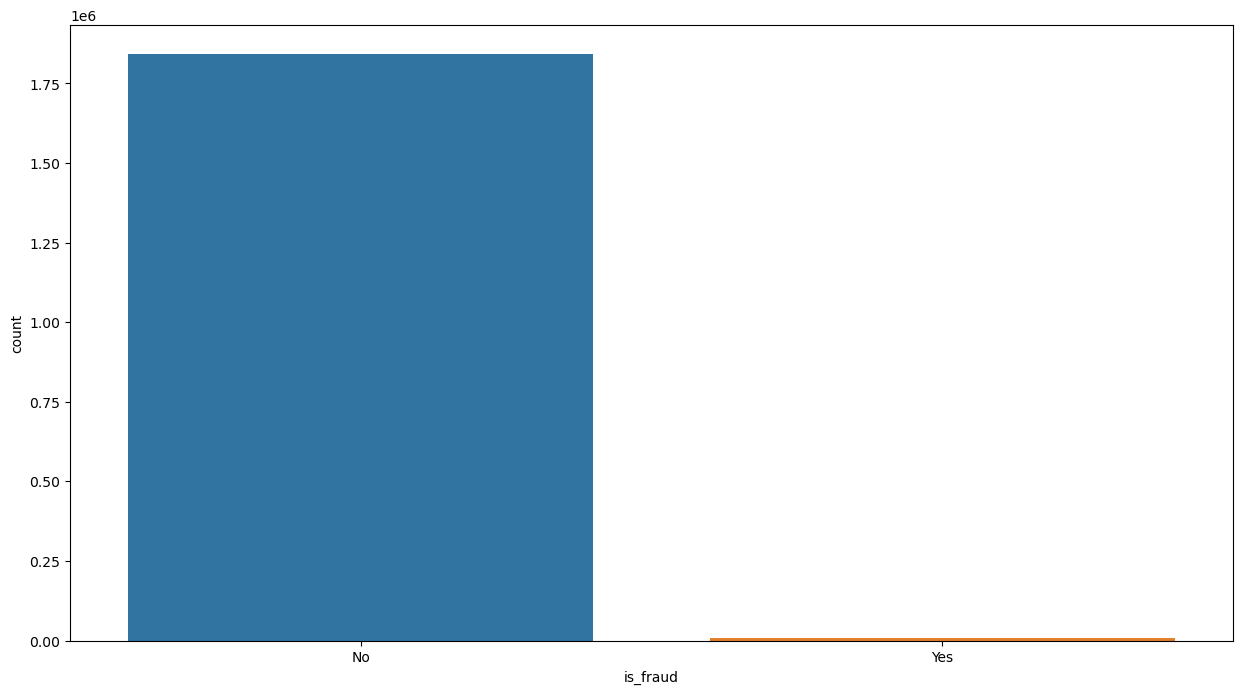

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='is_fraud');

What is the distribution of gender wrt is_fraud

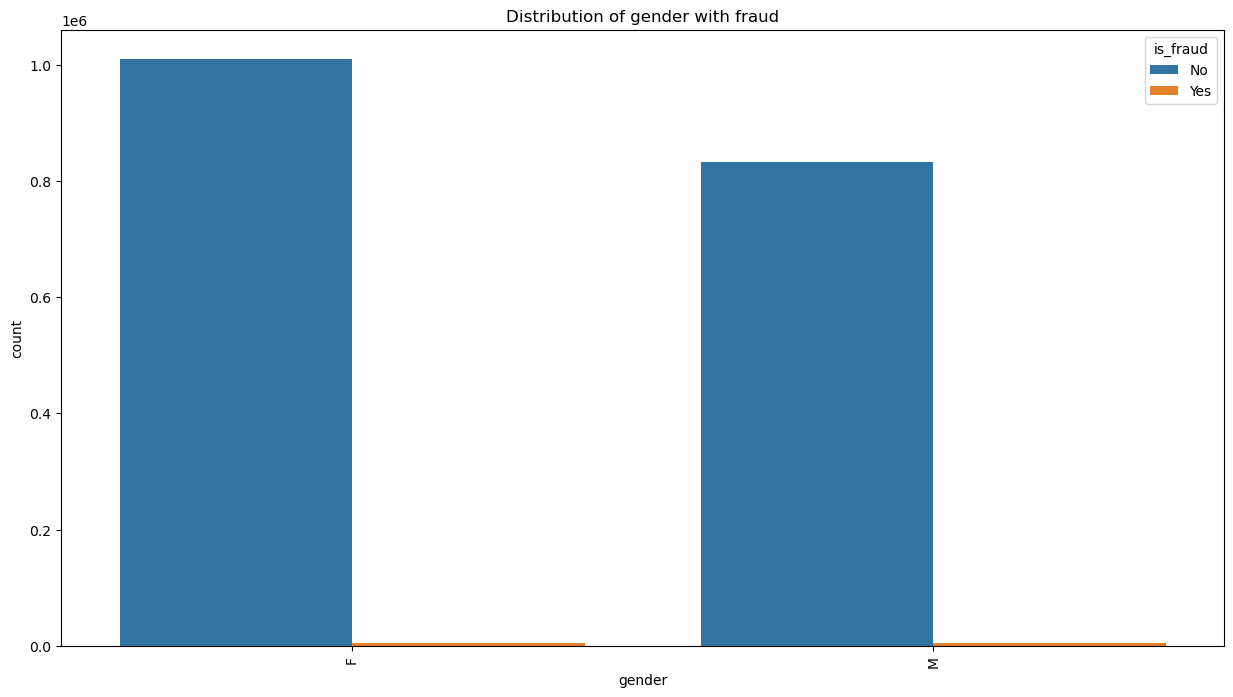

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='gender', hue='is_fraud')
plt.title('Distribution of gender with fraud')
plt.xticks(rotation=90);

What gender had the most fraudulent transactions?

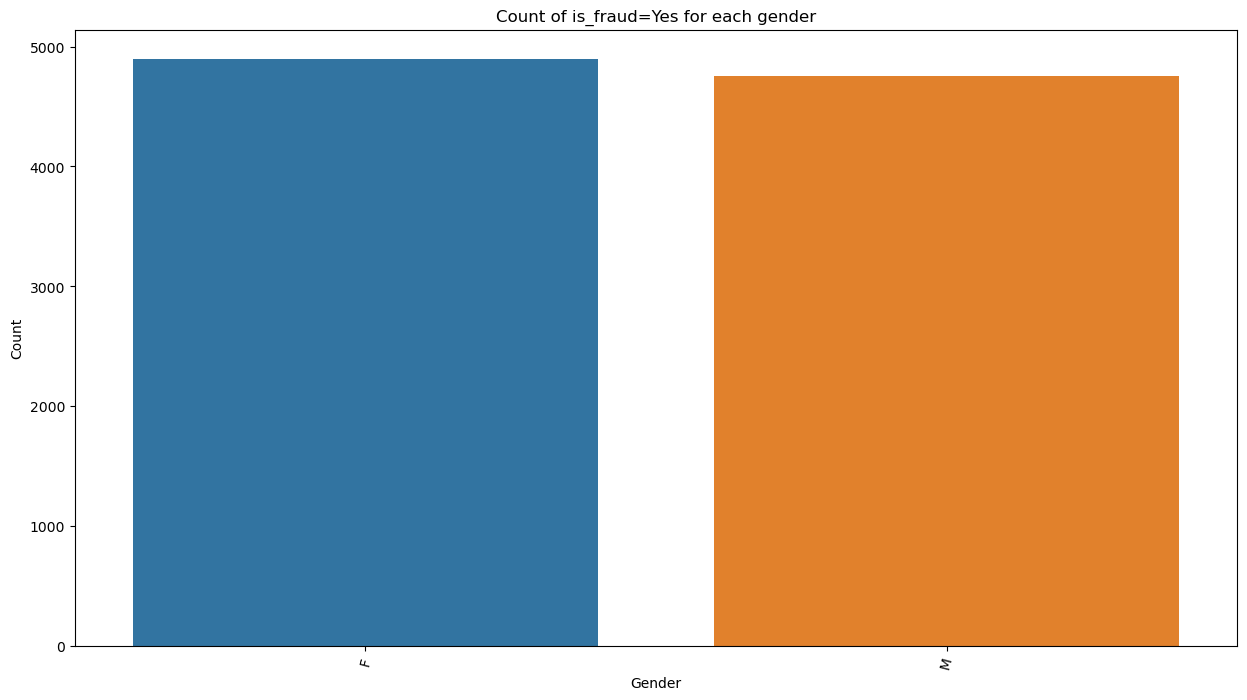

In [79]:
# grouping the data by gender and is fraud and counting the number of rows for each group
gender_counts = df.groupby(['gender', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = gender_counts[gender_counts['is_fraud'] == 'Yes']

plt.figure(figsize=(15,8))
sns.barplot(data=fraud_counts, x='gender', y='count')
plt.title('Count of is_fraud=Yes for each gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=75)
# display the plot
plt.show()

In [80]:
gender_counts

,gender,is_fraud,count
0,F,No,1009850
1,F,Yes,4899
2,M,No,832893
3,M,Yes,4752


In [81]:
fraud_counts

,gender,is_fraud,count
1,F,Yes,4899
3,M,Yes,4752


In [82]:
# plot distribution of city values with respect to is_fraud
# plt.figure(figsize=(15,8))
# sns.countplot(data=df, x='state', hue='is_fraud')
# plt.title('Distribution of state with fraud')
# plt.xticks(rotation=90)
# plt.show()

Which state records the highest fraud?

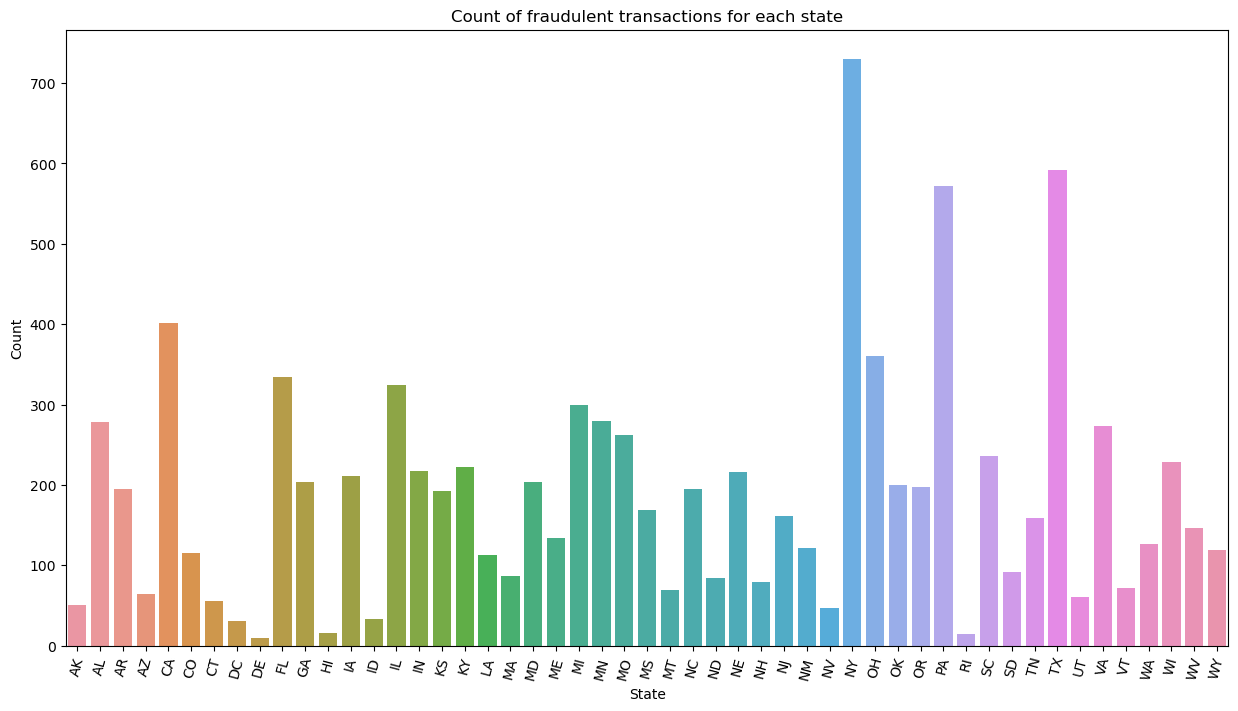

In [83]:
# grouping the data by states and is fraud and counting the number of rows for each group
state_counts = df.groupby(['state', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = state_counts[state_counts['is_fraud'] == 'Yes']

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=fraud_counts, x='state', y='count')
plt.title('Count of fraudulent transactions for each state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=75)
# display the plot
plt.show()

Which state has the highest record of no-fraud?

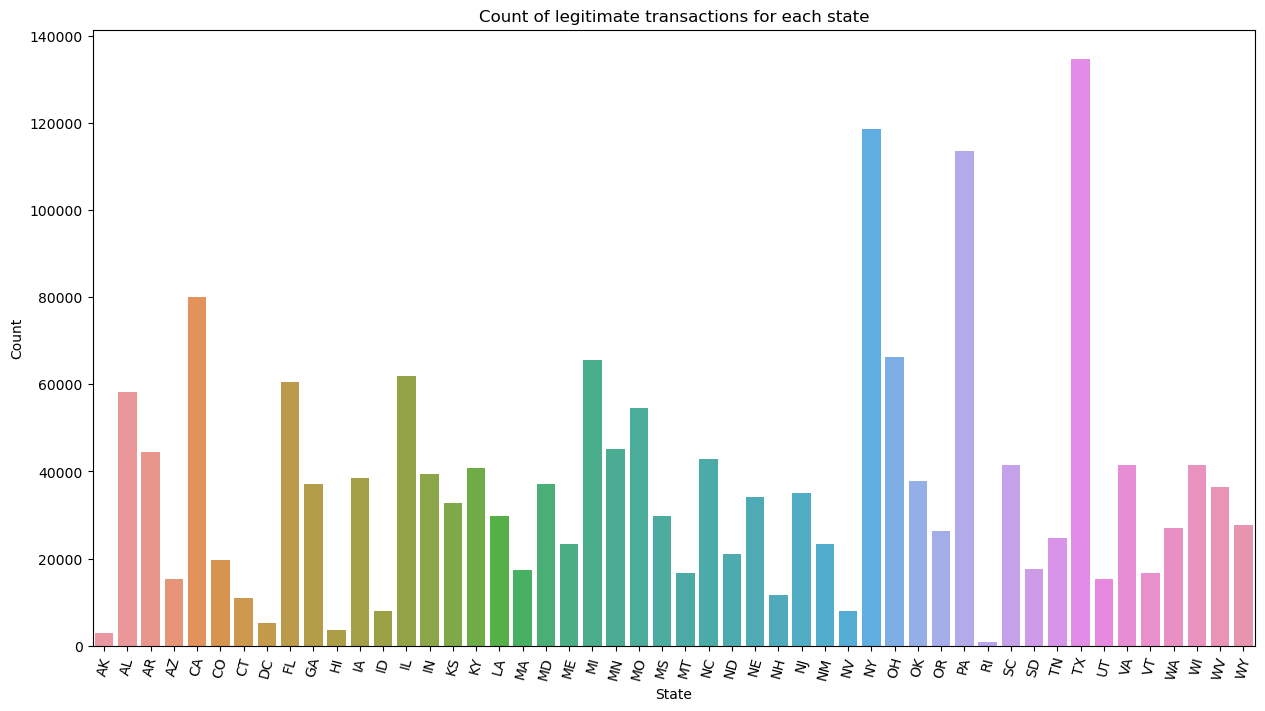

In [84]:
# grouping the data by states and is fraud and counting the number of rows for each group
state_counts = df.groupby(['state', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = state_counts[state_counts['is_fraud'] == 'No']

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=fraud_counts, x='state', y='count')
plt.title('Count of legitimate transactions for each state')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=75)
# display the plot
plt.show()

Which top 10 stores with the highest fraud?

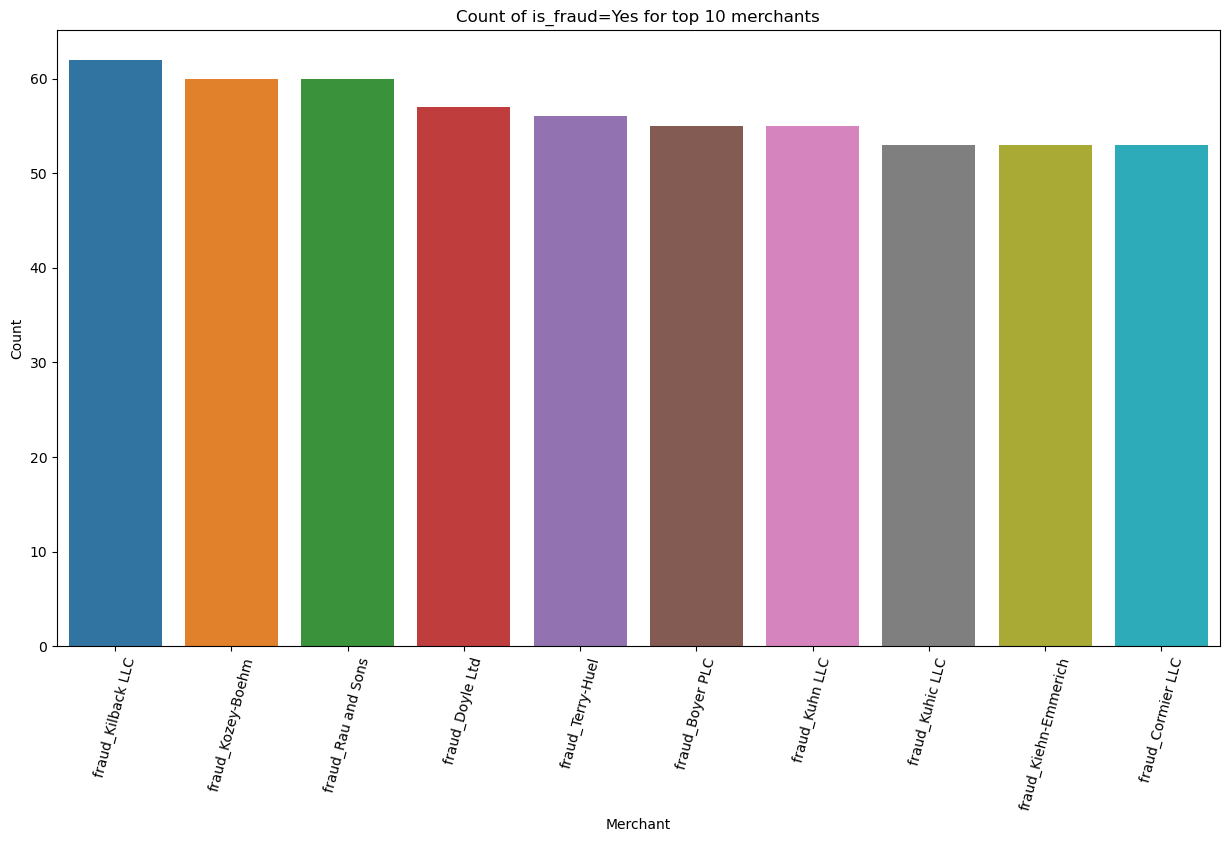

In [85]:
# grouping the data by merchants and is fraud and counting the number of rows for each group
merchant_counts = df.groupby(['merchant', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud=True
fraud_counts = merchant_counts[merchant_counts['is_fraud'] == 'Yes']


# sort the data by count in descending order and select the top 10 rows
top_merchants = fraud_counts.sort_values('count', ascending=False).head(10)

# create the barplot using Seaborn
plt.figure(figsize=(15,8))
sns.barplot(data=top_merchants, x='merchant', y='count')
plt.title('Count of is_fraud=Yes for top 10 merchants')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=75)

# display the plot
plt.show()

Which categories has the highest fraud?

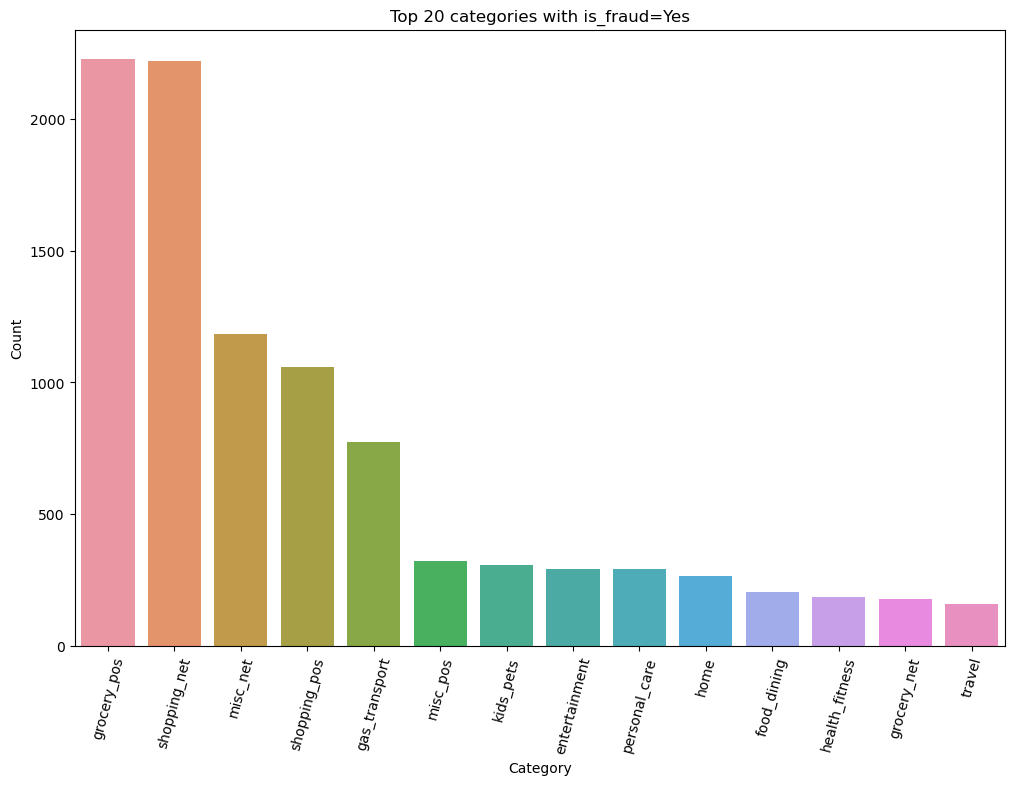

In [86]:
# grouping the data by category and is fraud and counting the number of rows for each group
category_counts = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# filter the data to only show is_fraud = No
no_fraud_counts = category_counts[category_counts['is_fraud'] == 'Yes']

# sort the values by count in descending order and get the top 20 categories
top_categories = no_fraud_counts.sort_values('count', ascending=False).head(20)

# create the barplot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories, x='category', y='count')
plt.title('Top 20 categories with is_fraud=Yes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

what is the highest amount taken by means of fraud?

In [87]:
# Sort the dataframe by amount in descending order and get the 10 highest amount
highest_amt = df[df['is_fraud'] == 'Yes'].sort_values(by='amt', ascending=False).head(10)
highest_amt['amt']

1262544    1376.04
514148     1371.81
30239      1334.07
1258483    1324.80
1570853    1320.92
1452524    1319.97
1721799    1318.89
821435     1313.18
1258594    1312.98
872879     1294.83
Name: amt, dtype: float64

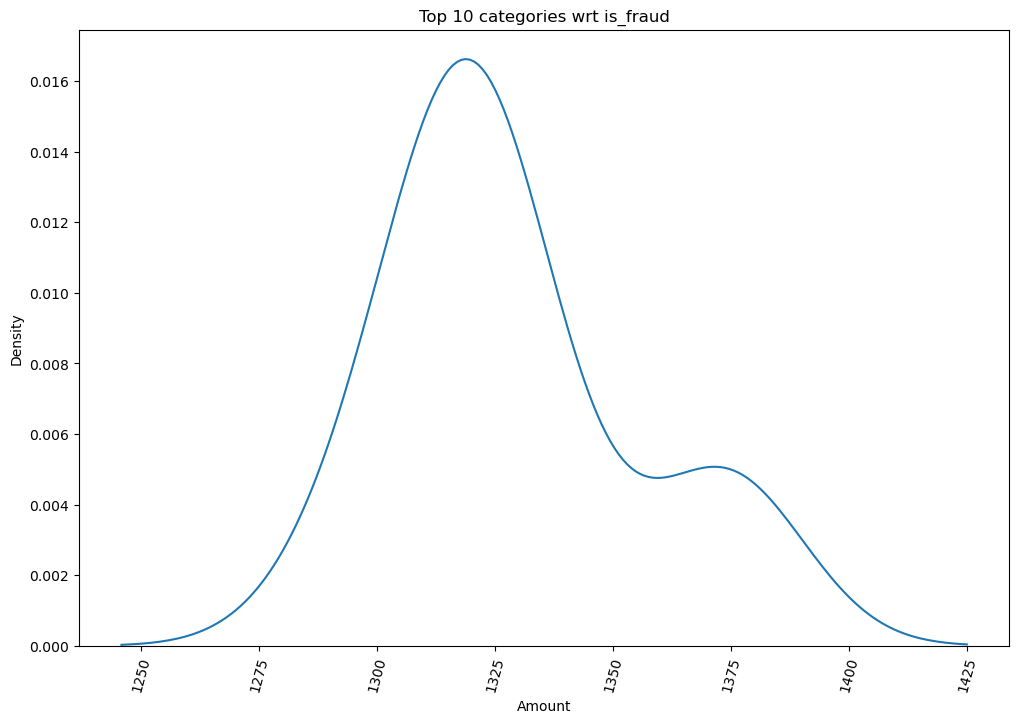

In [88]:
# create the barplot using Seaborn
plt.figure(figsize=(12, 8))
# Create a histogram of the 10 highest ages split by is_fraud
sns.kdeplot(x='amt', data=highest_amt)
plt.title('Top 10 categories wrt is_fraud')
plt.xlabel('Amount')
# plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

Correlation

In [89]:
df.corr().style.background_gradient(cmap='Oranges')

/tmp/ipykernel_236900/2324922876.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_date_year,trans_date_day,age
cc_num,1.000000,0.001826,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,0.000443,-0.000136,-0.001877
amt,0.001826,1.000000,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,-0.001266,0.000069,-0.010674
lat,-0.058744,-0.000670,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.001140,-0.000767,0.046801
long,-0.048429,-0.000735,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.000012,0.000115,-0.028671
city_pop,-0.009118,0.004921,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,-0.001660,0.000654,-0.091506
unix_time,0.000284,-0.002411,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,0.867243,0.048073,-0.004255
merch_lat,-0.058415,-0.000613,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.001108,-0.000865,0.046431
merch_long,-0.048421,-0.000711,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000010,0.000129,-0.028627
trans_date_year,0.000443,-0.001266,0.001140,0.000012,-0.001660,0.867243,0.001108,0.000010,1.000000,0.000743,-0.004635
trans_date_day,-0.000136,0.000069,-0.000767,0.000115,0.000654,0.048073,-0.000865,0.000129,0.000743,1.000000,-0.000547


### Try `OneClassSVM`

In [90]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, classification_report
from sklearn.calibration import LabelEncoder

import warnings
warnings.simplefilter('ignore')

In [91]:
fraud_rows_index = df[df['is_fraud'] == 'Yes'].index
fraud_rows_index.shape

(9651,)

In [92]:
legit_rows_index = df[df['is_fraud'] == 'No'].index
legit_rows_index.shape

(1842743,)

In [93]:
df['is_fraud'].shape

(1852394,)

In [94]:
df['is_fraud'].value_counts()

No     1842743
Yes       9651
Name: is_fraud, dtype: int64

In [95]:
df['is_fraud'].value_counts(normalize=True)

No     0.99479
Yes    0.00521
Name: is_fraud, dtype: float64

In [96]:
def fit_predict_outlier_model(
    df: pd.DataFrame, chunk_size: int, features: list[str], model
):
    """
    This function is used to fit and predict the outlier model. It takes in a dataframe, chunk size, features, and model.
    The function is used to label encode the features and target. It then fit and predict the model on the features and target.
    The function returns the F1 score.
    """
    # get the index of the fraud and legit rows
    fraud_perc = df["is_fraud"].value_counts(normalize=True)["Yes"]
    fraud_idx = round(fraud_perc * chunk_size)
    legit_idx = chunk_size - fraud_idx
    # use the index to get the fraud and legit rows
    df_fraud_subset = df.iloc[fraud_rows_index[:fraud_idx], :]
    df_legit_subset = df.iloc[legit_rows_index[:legit_idx], :]
    # concat the two dataframes
    df_subset = pd.concat([df_fraud_subset, df_legit_subset]).reset_index(drop=True)
    # get the features and target
    X = df_subset[features]
    y = df_subset["is_fraud"]
    # lael encode features and target
    X = X.apply(LabelEncoder().fit_transform)
    y = y.map({"Yes": 1, "No": 0})

    # fit and predict
    y_pred = model.fit_predict(X)
    y_pred = pd.Series(y_pred).map({-1: 1, 1: 0})
    score = f1_score(y, y_pred, average="macro")
    
    print(f"F1 score: {score}")
    print(classification_report(y, y_pred))
    return score


In [97]:
fit_predict_outlier_model(
    df,
    chunk_size=400_000,
    features=["merchant", "category", "age", "amt", "gender", "state"],
    model=OneClassSVM(nu=0.00521),
)


F1 score: 0.5005180739375888
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    397916
           1       0.01      0.01      0.01      2084

    accuracy                           0.99    400000
   macro avg       0.50      0.50      0.50    400000
weighted avg       0.99      0.99      0.99    400000



0.5005180739375888

In [111]:
# model = OneClassSVM(nu=0.00521).fit(svm_df.drop('is_fraud', axis=1))

- `model`: -1: `fraud`, 1: `legit`
- `data`: 1: `fraud`, 0: `legit`

In [ ]:
# from sklearn.metrics import f1_score, classification_report

# print(f"Accuracy: {accuracy_score(svm_df['is_fraud'], svm_df['svm_label'])}")
# print(f"F1-score: {f1_score(svm_df['is_fraud'], svm_df['svm_label'], average='macro')}")
# print('\n')
# print(classification_report(svm_df['is_fraud'], svm_df['svm_label']))  

### LOF

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,lat,long,city_pop,...,is_fraud,trans_date_month,trans_date_year,trans_date_day,trans_date_time,trans_date,age,datetime,time_str,full_name
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,36.0788,-81.1781,3495,...,No,January,2019,1,00:00:18,2019-01-01,35,2012-01-01 01:00:18,2012-01-01 01:00:18,Jennifer Banks
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,48.8878,-118.2105,149,...,No,January,2019,1,00:00:44,2019-01-01,44,2012-01-01 01:00:44,2012-01-01 01:00:44,Stephanie Gill
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,42.1808,-112.2620,4154,...,No,January,2019,1,00:00:51,2019-01-01,61,2012-01-01 01:00:51,2012-01-01 01:00:51,Edward Sanchez
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,46.2306,-112.1138,1939,...,No,January,2019,1,00:01:16,2019-01-01,56,2012-01-01 01:01:16,2012-01-01 01:01:16,Jeremy White
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,38.4207,-79.4629,99,...,No,January,2019,1,00:03:06,2019-01-01,37,2012-01-01 01:03:06,2012-01-01 01:03:06,Tyler Garcia


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import (GridSearchCV, 
                                     RepeatedStratifiedKFold, 
                                     StratifiedKFold)


In [ ]:
def get_best_n_neighbors(
    df: pd.DataFrame, chunk_size: int, features: list[str], range_num: int = 10
):
    """
    This function gets the best n_neighbors for the LocalOutlierFactor model.
    """
    # get the index of the fraud and legit rows
    fraud_perc = df["is_fraud"].value_counts(normalize=True)["Yes"]
    fraud_idx = round(fraud_perc * chunk_size)
    legit_idx = chunk_size - fraud_idx
    # use the index to get the fraud and legit rows
    df_fraud_subset = df.iloc[fraud_rows_index[:fraud_idx], :]
    df_legit_subset = df.iloc[legit_rows_index[:legit_idx], :]
    # concat the two dataframes
    df_subset = pd.concat([df_fraud_subset, df_legit_subset]).reset_index(drop=True)
    # get the features and target
    X = df_subset[features]
    y = df_subset["is_fraud"]
    # lael encode features and target
    X = X.apply(LabelEncoder().fit_transform)
    y = y.map({"Yes": 1, "No": 0})

    # create an empty list to store the scores
    scores = []

    # loop over the range of n_neighbors
    for num in range(1, range_num):
        lof = LocalOutlierFactor(n_neighbors=num, contamination=0.00521)
        y_pred = lof.fit_predict(X)
        y_pred = pd.Series(y_pred).map({-1: 1, 1: 0})
        score = f1_score(y, y_pred, average="macro")
        scores.append(score)
        print(f'n_neighbors: {num}, F1-score: {score}')
        print('====' * 10)

    # get the best n_neighbors
    best_n_neighbors = np.argmax(scores) * 1 + 1

    # log the best n_neighbors and max score
    print('\n')
    print(f"Best n_neighbors: {best_n_neighbors} with score {max(scores)}")

    # plot n_neighbors vs F1-score
    plt.figure(figsize=(10, 4))
    plt.plot(range(1, range_num), scores)
    plt.xticks(range(1, range_num))
    plt.title("n_neighbors vs F1-score")
    plt.xlabel("n_neighbors")
    plt.ylabel("F1-score")
    plt.show()


n_neighbors: 1, F1-score: 0.46881705992743444
n_neighbors: 2, F1-score: 0.4989305054911463
n_neighbors: 3, F1-score: 0.5015897907500565
n_neighbors: 4, F1-score: 0.5000247239735781
n_neighbors: 5, F1-score: 0.4989526954600314
n_neighbors: 6, F1-score: 0.4987305165708929
n_neighbors: 7, F1-score: 0.49878648253655955
n_neighbors: 8, F1-score: 0.498812066357979
n_neighbors: 9, F1-score: 0.4988366036496549


Best n_neighbors: 3 with score 0.5015897907500565


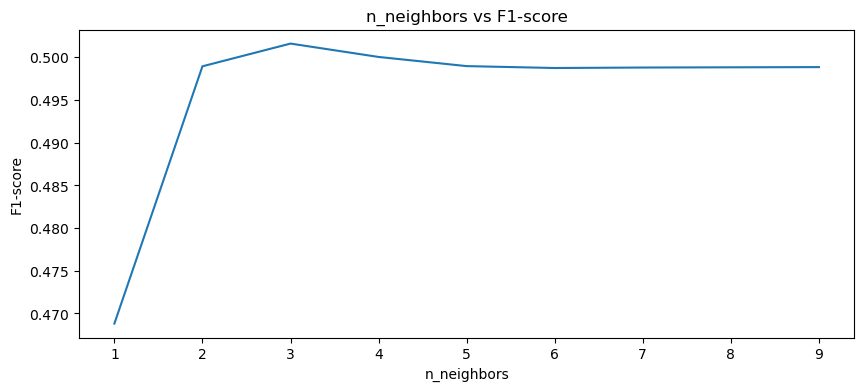

In [ ]:
get_best_n_neighbors(
    df,
    chunk_size=1_000_000,
    features=["merchant", "category", "age", "amt", "gender", "state"],
)


- `cv.split` returns index of split for X and y

In [142]:
pd.Series(np.array([1,-1])).replace({ -1: 1, 1: 0}, inplace=True)

In [143]:
[1 if i==-1 else 0 for i in np.array([1, -1])]

[0, 1]

In [ ]:
cv = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
  # print(X.iloc[train_idx, :])
  print(y.iloc[train_idx].value_counts())
  

0    2652
1      14
Name: is_fraud, dtype: int64
0    2653
1      14
Name: is_fraud, dtype: int64
0    2653
1      14
Name: is_fraud, dtype: int64


### City from lat/lon

In [ ]:
df = df.drop(['merch_lat', 'merch_long'], axis = 1)

In [ ]:
%pip install opencage -q 

In [ ]:
from opencage.geocoder import OpenCageGeocode

# Set up OpenCage Geocoder API with your API key
key = "c2bfb22f03684ee98626face0a4aaf49"
geocoder = OpenCageGeocode(key)

# # Load latitude and longitude data into a dataframe
# df = pd.read_csv('coordinates.csv')

# Define a function to convert lat/long to city
def reverse_geocode(lat, long):
    results = geocoder.reverse_geocode(lat, long)
    city = results[0]['components']['city']
    return city

# Apply the function to the latitude and longitude columns of the dataframe
df['city'] = df.apply(lambda x: reverse_geocode(x['lat'], x['long']), axis=1)

# Display the resulting dataframe with city names
print(df.head())

### Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['is_fraud'], axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(['is_fraud'], axis=1).columns)
df_scaled['is_fraud'] = df['is_fraud']


### Feature Engineering

In [ ]:
# Create transaction amount per hour feature
df_scaled['Amount_per_hour'] = df_scaled['Amount'] / (df_scaled['Time'] / 3600)

# Create transaction amount per cardholder feature
df_scaled['Amount_per_cardholder'] = df_scaled.groupby('Cardholder')['Amount'].transform('sum')

# Create transaction frequency per cardholder feature
df_scaled['Frequency_per_cardholder'] = df_scaled.groupby('Cardholder')['Cardholder'].transform('count')